In [50]:
# let's get the cifar10 data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# load the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()



In [51]:
# normalize the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# show the data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


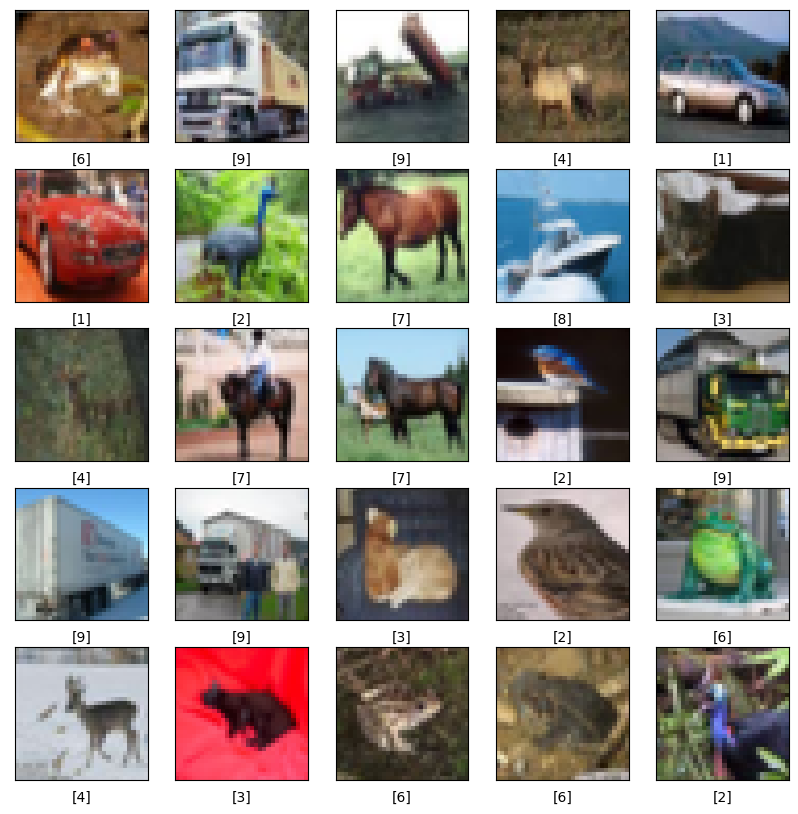

In [52]:
# show some images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i,:,:,:])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_labels[i])
plt.show()


In [53]:
# what is the size of each image?
print(train_images.shape[1:])


(32, 32, 3)


In [54]:
# let's create ontologies for the features 

import owlready2
from owlready2 import Thing, get_ontology, AllDisjoint, sync_reasoner_pellet, Imp, FunctionalProperty

# Owlready2 requires Java 8 or higher
# Owlready2 needs to have access to Java
# Define and change the following PATH if needed
owlready2.JAVA_EXE='C:/Users/oumai/Downloads/Protege-5.6.3-win/Protege-5.6.3/jre/bin/java.exe'

In [55]:
# read the xlsx file with the ontologies
import pandas as pd
df = pd.read_excel('features of cifar10.xlsx', sheet_name='Sheet1')
df

,Airplane,Automobile,Bird,Deer,Horse,Ship,Dog,Frog,Truck,Cat
0,Vehicle,Vehicle,Animal,Animal,Animal,Vehicle,Animal,Animal,Vehicle,Animal
1,Wing,Wheel,Wing,Herbivore,Herbivore,Metal,Carnivore,Amphibian,Metal,Carnivore
2,Wheel,Roof,Beak,Ear,Head,Roof,Pet,Head,Wheel,Pet
3,Tail,Windshield,Feather,Hoof,Neck,Wood,Eye,Eye,Brake light,Eye
4,Flap,Bumper,Eye,Tail,Ear,Sail,Ear,Nostrils,Glass,Ear
5,Roof,Hood,Eyelash,Head,Tail,Deck,Head,Mouth,Windshield,Head
6,Windsheild,Glass,Tail,Fur,Back,Glass,Tail,Skin,Window,Nose
7,Glass,Door,Leg,Leg,Leg,Window,Leg,Limb,Trailer,Whiskers
8,Door,Metal,Claw,Eye,Hoof,Bridge,Paw,NaN,Registration plate,Neck
9,Metal,Mirror,Head,Back,Mane,Lifeboat,Teeth,NaN,Roof,Tail


In [56]:
onto = get_ontology("http://www.semanticweb.org/ontologies/2020/1/CR.owl")

In [57]:
from owlready2 import ObjectProperty

with onto:
    class Vehicle(Thing):
        pass
    class Animal(Thing):
        pass

    AllDisjoint([Vehicle, Animal])

    class Pet(Animal):
        pass
    class Wild(Animal):
        pass
    AllDisjoint([Pet, Wild])

    class Plant(Thing):
        pass

    class Eats(ObjectProperty):
        domain = [Animal]
        range = [Thing]

    class Herbivore(Animal):
        equivalent_to = [Animal & Eats.only(Plant)]

    class Carnivore(Animal):
        equivalent_to = [Animal & Eats.only(Animal)]
    

    class Place(Thing):
        pass

    class LivesIn(ObjectProperty):
        domain = [Animal]
        range = [Place]

    class Water(Place):
        pass
    class Land(Place):
        pass
    AllDisjoint([Water, Land])

    class terrestrial(Animal):
        equivalent_to = [Animal & LivesIn.only(Land)]

    class aquatic(Animal):
        equivalent_to = [Animal & LivesIn.only(Water)]
        
    class amphibious(Animal):
        equivalent_to = [Animal & LivesIn.only(Land & Water)]

    

    
    

    
    

In [58]:
df['Cat']

0        Animal
1     Carnivore
2           Pet
3           Eye
4           Ear
5          Head
6          Nose
7      Whiskers
8          Neck
9          Tail
10          Fur
11        Claws
12        Mouth
13          NaN
14          NaN
Name: Cat, dtype: object

In [70]:
df['Bird'][1]='Wings'

In [76]:
df

,Airplane,Automobile,Bird,Deer,Horse,Ship,Dog,Frog,Truck,Cat
0,Vehicle,Vehicle,Animal,Animal,Animal,Vehicle,Animal,Animal,Vehicle,Animal
1,Wing,Wheel,Wings,Herbivore,Herbivore,Metal,Carnivore,Amphibian,Metal,Carnivore
2,Wheel,Roof,Beak,Ear,Head,Roof,Pet,Head,Wheel,Pet
3,Tail,Windshield,Feather,Hoof,Neck,Wood,Eye,Eye,Brake light,Eye
4,Flap,Bumper,Eye,Tail,Ear,Sail,Ear,Nostrils,Glass,Ear
5,Roof,Hood,Eyelash,Head,Tail,Deck,Head,Mouth,Windshield,Head
6,Windsheild,Glass,Tail,Fur,Back,Glass,Tail,Skin,Window,Nose
7,Glass,Door,Leg,Leg,Leg,Window,Leg,Limb,Trailer,Whiskers
8,Door,Metal,Claw,Eye,Hoof,Bridge,Paw,NaN,Registration plate,Neck
9,Metal,Mirror,Head,Back,Mane,Lifeboat,Teeth,NaN,Roof,Tail


In [72]:
# now lets move to body parts

with onto:

    class Bodypart(Thing):
        pass
    class Head(Bodypart):
        pass
    class Eye(Bodypart):
        pass
    class Ear(Bodypart):
        pass
    class Nose(Bodypart):
        pass
    class Mouth(Bodypart):
        pass
    class Neck(Bodypart):
        pass
    class Tail(Bodypart):
        pass
    class Whiskers(Bodypart):
        pass
    class Leg(Bodypart):
        pass
    class Claw(Bodypart):
        pass
    class Fur(Bodypart):
        pass
    class Teeth(Bodypart):
        pass

    class Nostrils(Bodypart):
        pass
    class Skin(Bodypart):
        pass
    class Limbs(Bodypart):
        pass

    class Paw(Bodypart):
        pass
    class Mane(Bodypart):
        pass
    class Hoof(Bodypart):
        pass
    class Back(Bodypart):
        pass
    class Knee(Bodypart):
        pass
    class Feather(Bodypart):
        pass

    class Wings(Bodypart):
        pass
    class Beak(Bodypart):
        pass

    class Has(ObjectProperty):
        domain = [Animal]
        range = [Bodypart]
    


In [73]:
sync_reasoner_pellet([onto], infer_property_values=True, infer_data_property_values=True, debug=True, keep_tmp_file=True)

* Owlready2 * Running Pellet...
    C:/Users/oumai/Downloads/Protege-5.6.3-win/Protege-5.6.3/jre/bin/java.exe -Xmx2000M -cp c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\owlready2\pellet\antlr-3.2.jar;c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\owlready2\pellet\antlr-runtime-3.2.jar;c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\owlready2\pellet\aterm-java-1.6.jar;c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\owlready2\pellet\commons-codec-1.6.jar;c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\owlready2\pellet\httpclient-4.2.3.jar;c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\owlready2\pellet\httpcore-4.2.2.jar;c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\owlready2\pellet\jcl-over-slf4j-1.6.4.jar;c:\Users\oumai\AppData\Local\Programs\Python\Python311\Lib\site-packages\owlready2\pellet\jena-arq-2.10.

In [74]:
with onto:
    class Cat(Animal): pass
    
    rule_cat = Imp()
    rule_cat.set_as_rule('''Pet(?x),\
                        terrestrial(?x),\
                        Carnivore(?x),\
                        Has(?x, Head),\
                        Has(?x, Eye),\
                        Has(?x, Ear),\
                        Has(?x, Nose),\
                        Has(?x, Mouth),\
                        Has(?x, Neck),\
                        Has(?x, Tail),\
                        Has(?x, Whiskers),\
                        Has(?x, Leg),\
                        Has(?x, Claws),\
                        Has(?x, Fur),\
                        Has(?x, Teeth) -> Cat(?x)''')
                         

In [77]:
with onto:
    class Dog(Animal): pass
    
    rule_dog = Imp()
    rule_dog.set_as_rule('''Pet(?x),\
                        terrestrial(?x),\
                        Carnivore(?x),\
                        Has(?x, Head),\
                        Has(?x, Eye),\
                        Has(?x, Ear),\
                        Has(?x, Nose),\
                        Has(?x, Mouth),\
                        Has(?x, Neck),\
                        Has(?x, Tail),\
                        Has(?x, Leg),\
                        Has(?x, Paw),\
                        Has(?x, Fur),\
                        Has(?x, Teeth) -> Dog(?x)''')

In [78]:
with onto:
    class Frog(Animal): pass
    
    rule_frog = Imp()
    rule_frog.set_as_rule('''amphibious(?x),\
                          Carnivore(?x),\
                          Has(?x, Head),\
                          Has(?x, Eye),\
                          Has(?x, Nostrils),\
                          Has(?x, Mouth),\
                          Has(?x, Skin),\
                          Has(?x, Limbs)
                          -> Frog(?x)''')

In [79]:
with onto:
    class Deer(Animal): pass
    
    rule_deer = Imp()
    rule_deer.set_as_rule('''Wild(?x),\
                          terrestrial(?x),\
                            Herbivore(?x),\
                            Has(?x, Head),\
                            Has(?x, Eye),\
                            Has(?x, Ear),\
                            Has(?x, Nose),\
                            Has(?x, Mouth),\
                            Has(?x, Neck),\
                            Has(?x, Tail),\
                            Has(?x, Leg),\
                            Has(?x, Hoof),\
                            Has(?x, Fur),\
                            Has(?x,Back),\
                            Has(?x, Teeth) -> Deer(?x)''')
                          

In [80]:
with onto:
    class Horse(Animal): pass
    
    rule_horse = Imp()
    rule_horse.set_as_rule('''terrestrial(?x),\
                            Herbivore(?x),\
                            Has(?x, Head),\
                            Has(?x, Eye),\
                            Has(?x, Ear),\
                            Has(?x, Nose),\
                            Has(?x, Mouth),\
                            Has(?x, Neck),\
                            Has(?x, Tail),\
                            Has(?x, Leg),\
                            Has(?x, Hoof),\
                            Has(?x, Mane),\
                            Has(?x, Back),\
                            Has(?x, Teeth) -> Horse(?x)''')

In [81]:
with onto:
    class Bird(Animal): pass
    
    rule_bird = Imp()
    rule_bird.set_as_rule('''Animal(?x),\
                            Has(?x, Head),\
                            Has(?x, Eye),\
                            Has(?x, Neck),\
                            Has(?x, Tail),\
                            Has(?x, Leg),\
                            Has(?x, Claw),\
                            Has(?x, Feather),\
                            Has(?x, Wings),\
                            Has(?x, Beak) -> Bird(?x)''')

In [82]:
# Now let's move to vehicles
with onto:
    class isAirplane(Thing >> bool, FunctionalProperty):
        pass
    class isAutomobile(Thing >> bool, FunctionalProperty):
        pass
    class isShip(Thing >> bool, FunctionalProperty):
        pass
    class isTruck(Thing >> bool, FunctionalProperty):
        pass
    

In [83]:
df

,Airplane,Automobile,Bird,Deer,Horse,Ship,Dog,Frog,Truck,Cat
0,Vehicle,Vehicle,Animal,Animal,Animal,Vehicle,Animal,Animal,Vehicle,Animal
1,Wing,Wheel,Wings,Herbivore,Herbivore,Metal,Carnivore,Amphibian,Metal,Carnivore
2,Wheel,Roof,Beak,Ear,Head,Roof,Pet,Head,Wheel,Pet
3,Tail,Windshield,Feather,Hoof,Neck,Wood,Eye,Eye,Brake light,Eye
4,Flap,Bumper,Eye,Tail,Ear,Sail,Ear,Nostrils,Glass,Ear
5,Roof,Hood,Eyelash,Head,Tail,Deck,Head,Mouth,Windshield,Head
6,Windsheild,Glass,Tail,Fur,Back,Glass,Tail,Skin,Window,Nose
7,Glass,Door,Leg,Leg,Leg,Window,Leg,Limb,Trailer,Whiskers
8,Door,Metal,Claw,Eye,Hoof,Bridge,Paw,NaN,Registration plate,Neck
9,Metal,Mirror,Head,Back,Mane,Lifeboat,Teeth,NaN,Roof,Tail


In [84]:
# vehicle parts

with onto:

    class Vehiclepart(Thing):
        pass
    class Wing_(Vehiclepart):
        pass
    class Wheel(Vehiclepart):
        pass
    class Door(Vehiclepart):
        pass
    class Tail_(Vehiclepart):
        pass
    class Window(Vehiclepart):
        pass
    class Roof(Vehiclepart):
        pass
    class Windshield(Vehiclepart):
        pass
    class Glass(Vehiclepart):
        pass
    class Metal(Vehiclepart):
        pass
    class Flap(Vehiclepart):
        pass
    class Bumper(Vehiclepart):
        pass
    class Hood(Vehiclepart):
        pass
    class Brakelight(Vehiclepart):
        pass
    class Headlight(Vehiclepart):
        pass
    class Registrationplate(Vehiclepart):
        pass
    class Mirror(Vehiclepart):
        pass
    class Wood(Vehiclepart):
        pass
    class Sail(Vehiclepart):
        pass
    class Deck(Vehiclepart):
        pass
    class Lifeboat(Vehiclepart):
        pass
    class Bridge(Vehiclepart):
        pass
    class Trailer(Vehiclepart):
        pass

    class IspartOf(ObjectProperty):
        domain = [Vehiclepart]
        range = [Vehicle]